<a href="https://colab.research.google.com/github/radhakrishnan-omotec/arwan-iris-dog-repo/blob/main/Dog_classification_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Bark Analysis

Automated Dog Bark Classification
Using Machine Learning for Breed-Specific Analysis

### Arwan Makhija

In [1]:
!git clone https://github.com/radhakrishnan-omotec/arwan-iris-dog-repo.git

Cloning into 'arwan-iris-dog-repo'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 29 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 8.82 MiB | 8.98 MiB/s, done.
Resolving deltas: 100% (11/11), done.


##Download and explore the dataset

In [2]:
# STEP 1: Connect to the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# STEP 2: Load the folder in the connected Google Drive
import os

# Change this path to the folder you want to analyze
folder_path = '/content/drive/MyDrive/1.ALL-RESEARCH/0-IRIS-ARWAN/DATASET'


# Check if the folder exists
if not os.path.exists(folder_path):
    raise Exception(f"The folder {folder_path} does not exist. Please check the path.")
else:
    print("Folder Loaded Successfully")


Folder Loaded Successfully


In [4]:
# STEP 3: Count of Audio files Loaded in the folder in the connected Google Drive
import pathlib
# Define the directory path
data_dir = pathlib.Path('/content/drive/MyDrive/1.ALL-RESEARCH/0-IRIS-ARWAN/DATASET')
# Specify the audio file extensions to look for
audio_extensions = {'.wav'}
# Use pathlib to find all audio files in the directory and subdirectories
audio_files = [f for f in data_dir.rglob('*') if f.suffix.lower() in audio_extensions]
# Count the number of audio files
num_audio = len(audio_files)
print(f"Number of audio: {num_audio}")

Number of audio: 1000


## Loading the CSV File

In [5]:
import pandas as pd
import numpy as np
import os, librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
print("Imports Loaded")

Imports Loaded


In [6]:
# Visualization
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers, Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Metrics
from sklearn.metrics import confusion_matrix
print("All Imports Loaded")

All Imports Loaded


In [7]:
import pandas as pd
import numpy as np
import os, librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Visualization
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers, Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Metrics
from sklearn.metrics import confusion_matrix

# Suppressing warnings
from warnings import filterwarnings
filterwarnings('ignore')
print("Complete Imports Loaded")

Complete Imports Loaded


In [12]:
data = pd.read_csv('/content/drive/MyDrive/1.ALL-RESEARCH/0-IRIS-ARWAN/dog_audio_test.csv')
audioPath = ('/content/drive/MyDrive/1.ALL-RESEARCH/0-IRIS-ARWAN/')
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,1,dog_emotion_aggression
1,100652-3-0-0.wav,100652,0.0,4.000000,1,2,1,dog_emotion_aggression
2,100652-3-0-1.wav,100652,0.5,4.500000,1,2,1,dog_emotion_aggression
3,100652-3-0-2.wav,100652,1.0,5.000000,1,2,1,dog_emotion_aggression
4,100652-3-0-3.wav,100652,1.5,5.500000,1,2,1,dog_emotion_aggression


In [13]:
data.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class
995,97193-3-0-4.wav,97193,2.000000,6.000000,1,2,5,dog_emotion_frustration
996,97193-3-0-6.wav,97193,3.000000,7.000000,1,2,5,dog_emotion_frustration
997,97392-3-0-0.wav,97392,0.000000,2.773946,1,6,5,dog_emotion_frustration
998,97756-3-0-0.wav,97756,0.141727,1.290466,1,10,5,dog_emotion_frustration
999,99185-3-0-0.wav,99185,0.341411,0.950911,1,5,5,dog_emotion_frustration


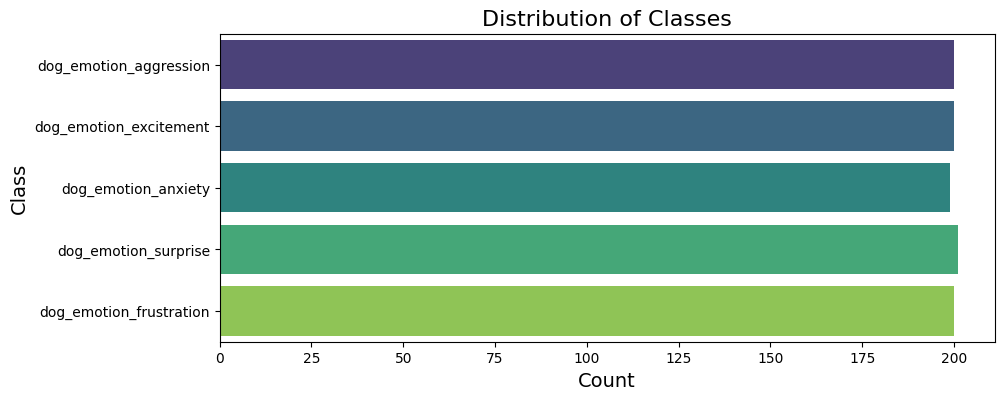

In [14]:
plt.figure(figsize = (10, 4))
sns.countplot(y = data['class'], palette = 'viridis')
plt.title('Distribution of Classes', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Class', fontsize = 14)
plt.show()

In [ ]:
# Displaying a random waveform and spectrogram

# Randomly selecting a row
row = data.sample(1).iloc[0]

# Constructing file path
audioFile = os.path.join(audioPath, 'fold' + str(row['fold']), row['slice_file_name'])

# Loading audio file
waveform, sampleRate = librosa.load(audioFile)

# Displaying audio
print(f"Class : {row['class']}\n")
ipd.display(ipd.Audio(waveform, rate = sampleRate))

# Displaying waveform
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.plot(waveform)
plt.title('Waveform', fontsize = 16)
plt.xlabel('Sample Index', fontsize = 12)
plt.ylabel('Amplitude', fontsize = 12)

# Displaying spectrogram
plt.subplot(1, 2, 2)
plt.specgram(waveform, Fs = sampleRate)
plt.title('Spectrogram', fontsize = 16)
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Frequency (Hz)', fontsize = 12)

plt.show()